### interactive viewer of the radlite datacube
### based on https://matplotlib.org/stable/api/animation_api.html

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
from astropy.io import fits  
from astropy.visualization import (AsinhStretch, LogStretch, ImageNormalize)
from matplotlib.animation import FuncAnimation

from IPython.display import HTML
%matplotlib inline

In [2]:
path = "./radlite/"
filename = "radlite_image.fits"
#filename = "radlite_convolved.fits"

f = fits.open(path+filename)
continuum = f[1].data
line = f[2].data
hd = f[2].header
wave = hd['WAVELEN']    # microns

In [3]:
# crop the cube in each axes; edit as appropriate
i1, i2 = 30, 70
j1, j2 = 30, 70
k1, k2 = 35, 60
frames = np.linspace(k1, k2, k2-k1+1, dtype=int)
v = hd['CRVAL3'] + (1 + np.arange(hd['NAXIS3']) - hd['CRPIX3']) * hd['CDELT3']
line_max = np.max(np.max(line[:, j1:j2, i1:i2], axis=(1,2)))

j = np.arange(0, j2-j1)
i = np.arange(0, i2-i1)
jj, ii = np.meshgrid(j, i)

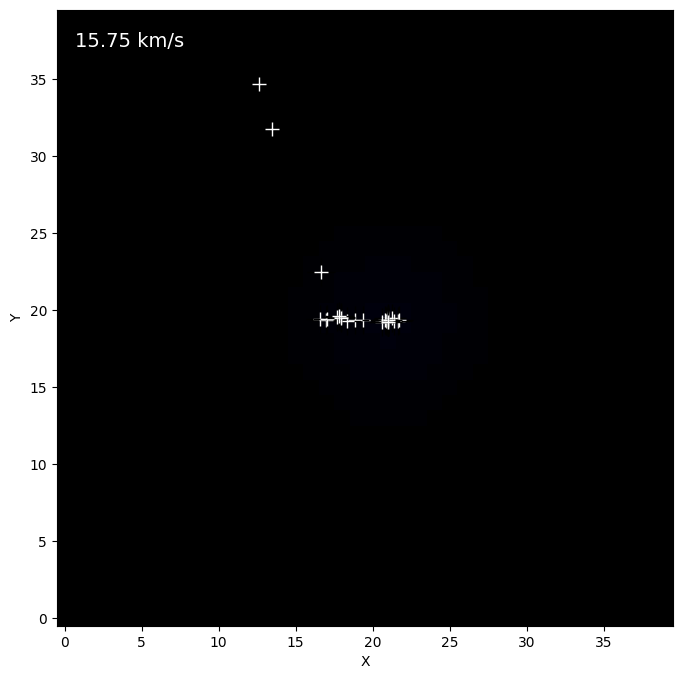

In [4]:
fig, ax = plt.subplots(figsize=(8,8))

# this is needed to initialize animate but unfortunately also creates a separate, static plot under the animation
norm = ImageNormalize(vmin=0, vmax=line_max, stretch=LogStretch())
slice = line[k1, j1:j2, i1:i2]
implt = ax.imshow(slice, cmap='gnuplot2', origin='lower', norm=norm)#, interpolation='bilinear')
ax.set_xlabel("X")
ax.set_ylabel("Y")

def animate(k):
    slice = line[k, j1:j2, i1:i2]
    implt.set_data(slice)
    ax.text(0.03, 0.94, f"{v[k]:.2f} km/s", fontsize=14, color='white', backgroundcolor='black', transform = ax.transAxes)
    jmean = np.sum(jj * slice) / np.sum(slice)
    imean = np.sum(ii * slice) / np.sum(slice)
    ax.plot(jmean, imean, 'k+', ms=20)
    ax.plot(jmean, imean, 'w+', ms=10)
    return implt,

ani = FuncAnimation(fig, animate, frames=frames)
HTML(ani.to_jshtml())
